In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
random_state = 0

### Stepwise working of KMeans on Synthetic Data

iterations starting


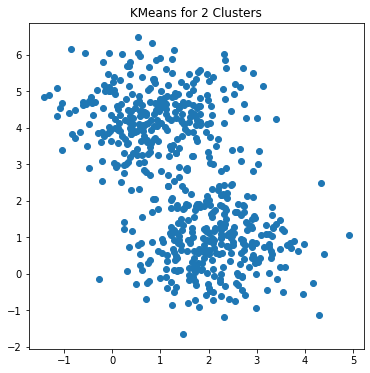

Chosen Random Centroids :

[[[3.24778017 1.08246297]
  [1.09049096 4.66557775]]]


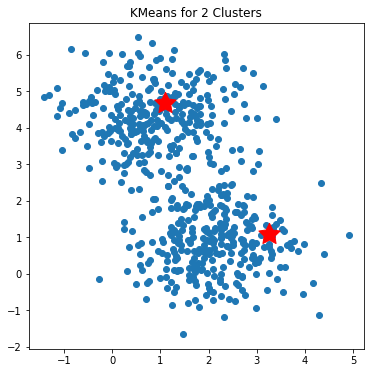

iter: 1 - first: [2.1316117  0.85614026], second: [0.86417214 4.29941612]


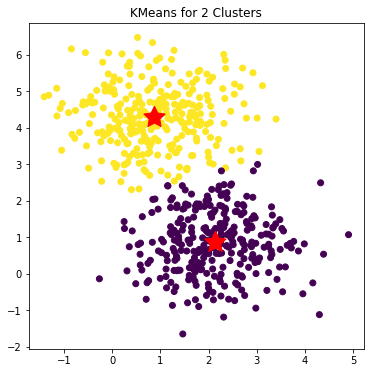

iter: 2 - first: [2.11952699 0.84394718], second: [0.88057662 4.30017479]


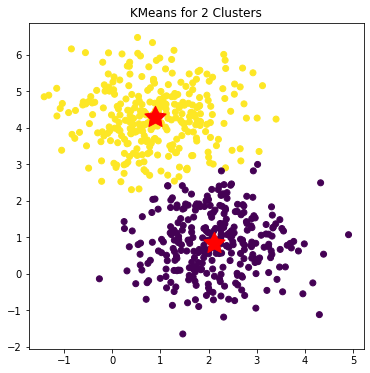

iter: 3 - first: [2.11952699 0.84394718], second: [0.88057662 4.30017479]


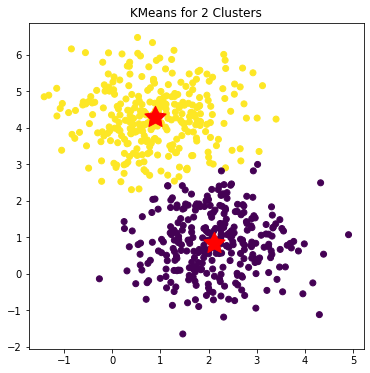

iter: 4 - first: [2.11952699 0.84394718], second: [0.88057662 4.30017479]


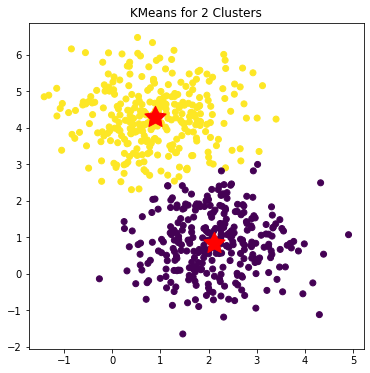

In [37]:
X,_= make_blobs(n_samples=600, centers=2,
                       cluster_std=0.90, random_state=0)
iterations = 4
indx=np.random.randint(600, size=(1,2))
print(f'iterations starting')
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0],X[:,1])
plt.title("KMeans for 2 Clusters")
plt.savefig('0.jpg')
plt.show()
print("Chosen Random Centroids :\n")
ran_val=X[indx,:]
print(ran_val)
centroids = [[ran_val[0][0][0],ran_val[0][1][0]],[ran_val[0][0][1],ran_val[0][1][1]]]
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[0],centroids[1], s=500,marker=(5, 1),c='red')
plt.title("KMeans for 2 Clusters")
plt.savefig('1.jpg')
plt.show()
row=col=0
for i in range(iterations):
    plt.figure(figsize=(6, 6))
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids),
        n_clusters=2,
        random_state=1)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    print(f'iter: {i+1} - first: {centroids[0]}, second: {centroids[1]}')
    plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,marker=(5, 1),c='red')
    plt.title("KMeans for 2 Clusters")
    plt.savefig(str(i+2)+'.jpg')
    plt.show()
    col=col+1
    if col==2:
        col=0
        row=row+1

GIF Stored in :  /Users/jovi/Desktop/Day6


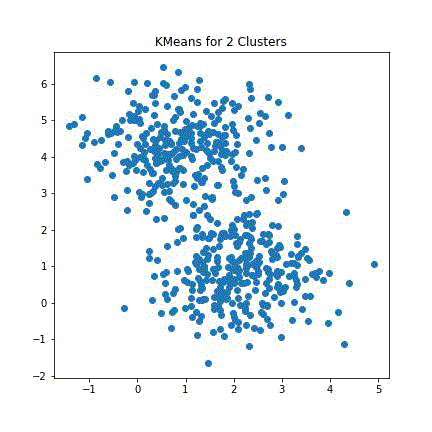

In [3]:
import glob
import os
cwd=os.getcwd()
print("GIF Stored in : ",cwd)
def make_gif(frame_folder):
    from PIL import Image
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.jpg"))]
    frame_one = frames[0]
    frame_one.save("kmean_ani.gif", format="GIF", append_images=frames,save_all=True, duration=2000, loop=0)
make_gif(str(cwd)+"/")
from IPython.display import Image
Image(str(cwd)+"/kmean_ani.gif")

## KMeans on Banknote Data

In [4]:
# reading the excel file
df = pd.read_excel('Banknote_Dataset.xlsx')
#print first 5 rows 
df.head()

,var,skew,kurt,ent,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
selcted_features=['var','skew']
df2=df[selcted_features]
X=df2.to_numpy()
X

array([[  3.6216 ,   8.6661 ],
       [  4.5459 ,   8.1674 ],
       [  3.866  ,  -2.6383 ],
       ...,
       [ -3.7503 , -13.4586 ],
       [ -3.5637 ,  -8.3827 ],
       [ -2.5419 ,  -0.65804]])

In [6]:
kmeans = KMeans(n_clusters=2,n_init='auto',random_state=random_state,init='random',max_iter=50).fit(X)

print('Iterations until convergence:', kmeans.n_iter_)
print('Final centroids:\n', kmeans.cluster_centers_)

Iterations until convergence: 3
Final centroids:
 [[ 0.88960876  5.951439  ]
 [-0.2000401  -3.67905895]]


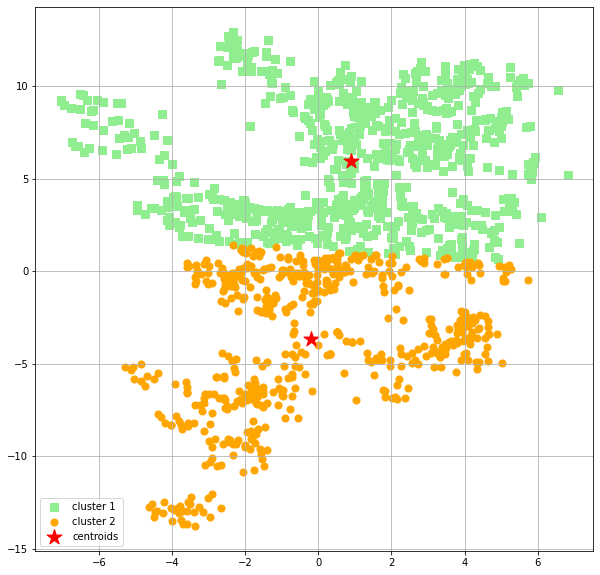

In [7]:
y_clust = kmeans.predict(X)
plt.figure(figsize=(10, 10))
plt.scatter(X[y_clust == 0, 0],
            X[y_clust == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_clust == 1,0],
            X[y_clust == 1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend(loc='lower left',
           scatterpoints=1)
plt.grid()
plt.show()

### Kmeans stepwise on Bank Note Data

iter: 1 - first: [-1.99229277 -2.08448187], second: [2.1735526  4.79584054]


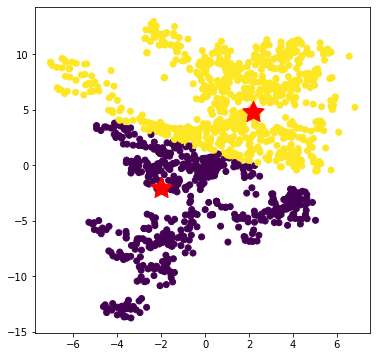

iter: 2 - first: [-0.72682808 -3.40510793], second: [1.29898986 5.89422612]


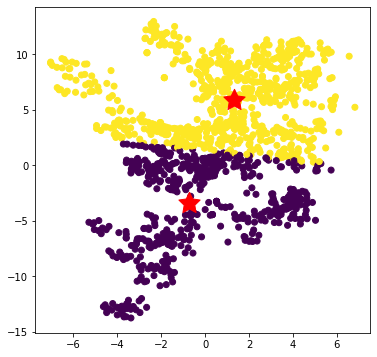

iter: 3 - first: [-0.35655802 -3.61712107], second: [1.00903691 5.95486708]


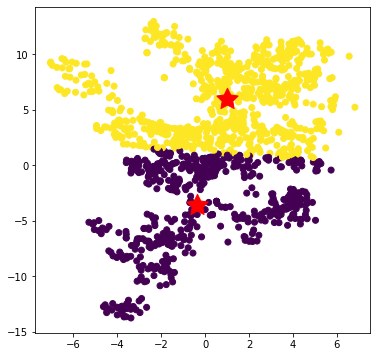

iter: 4 - first: [-0.22024724 -3.67649947], second: [0.90414372 5.94959797]


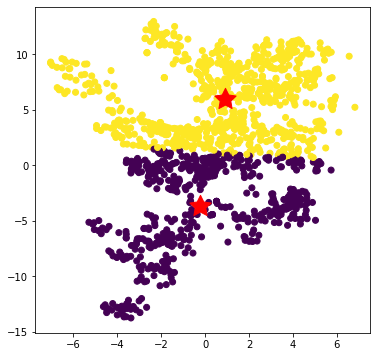

In [8]:
iterations = 4
centroids = None
row=col=0
for i in range(iterations):
    plt.figure(figsize=(6, 6))
    kmeans = KMeans(
        max_iter=1,
        n_init=1,
        init=(centroids if centroids is not None else 'random'),
        n_clusters=2,
        random_state=1)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    print(f'iter: {i+1} - first: {centroids[0]}, second: {centroids[1]}')
    plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=500,marker=(5, 1),c='red')
    plt.show()
    col=col+1
    if col==2:
        col=0
        row=row+1

### KMeans with different values of K (clusters)

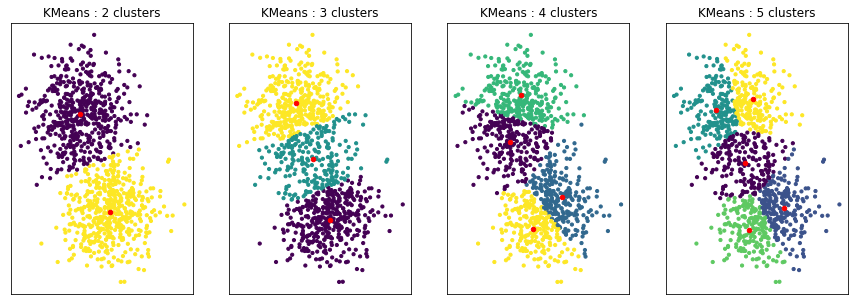

In [9]:
# Generate sample data
n_samples = 1000

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Number of cluster centers for KMeans (Value of K)
n_clusters_list = [2, 3, 4, 5]

# Make subplots for each variant
fig, axs = plt.subplots(1, len(n_clusters_list), figsize=(15, 5))

axs = axs.T

for j, n_clusters in enumerate(n_clusters_list):
    #Seting up Kmeans
    algo = KMeans(n_clusters=n_clusters,init='random',random_state=random_state, n_init=3)
    algo.fit(X)
    #Cluster Centers
    centers = algo.cluster_centers_
    axs[j].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
    axs[j].scatter(centers[:, 0], centers[:, 1], c="r", s=20)
    axs[j].set_title(f"KMeans : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()